In [1]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
import pandas as pd
import os
import scipy as sp
import seaborn as sns
import json
import yaml
import functools
import itertools

In [2]:
%ls ../

bench.cc           CURRENT            Makefile        sandbox
bench_cc*          extract-cpu.sh*    notebooks/      setup.sh*
bench.go           figures/           out.csv         util*
build-bench.sh*    go.mod             parameters.sh*  util.cc
chacha20_bench*    go.sum             README.md
chacha20_bench.c   launch_eval_c.sh*  res.out
chachapoly-bench*  launch_eval.sh*    results/


In [8]:
res_file = "../google_bench/out.csv"

In [9]:
15/100

0.15

In [10]:
names = ['benchmark', 'payload', 'time', 'cpu']
df = pd.read_csv(f"{res_file}", names=names)
df['time'] /= 1000
df_encrypt = df[df.benchmark == "BM_Encrypt"]
df_decrypt = df[df.benchmark == "BM_Decrypt"]

In [34]:
def draw_dashed_line(x, ymin=0, ymax=0, text=None, ytext=1):
    plt.vlines(x=x, ymin=0, ymax=ymax, color = 'black', linestyles="dashed")
    if text is not None:
        plt.text(x=x, y=ytext, s=text, ha='center', va='center', rotation='vertical', backgroundcolor='white')

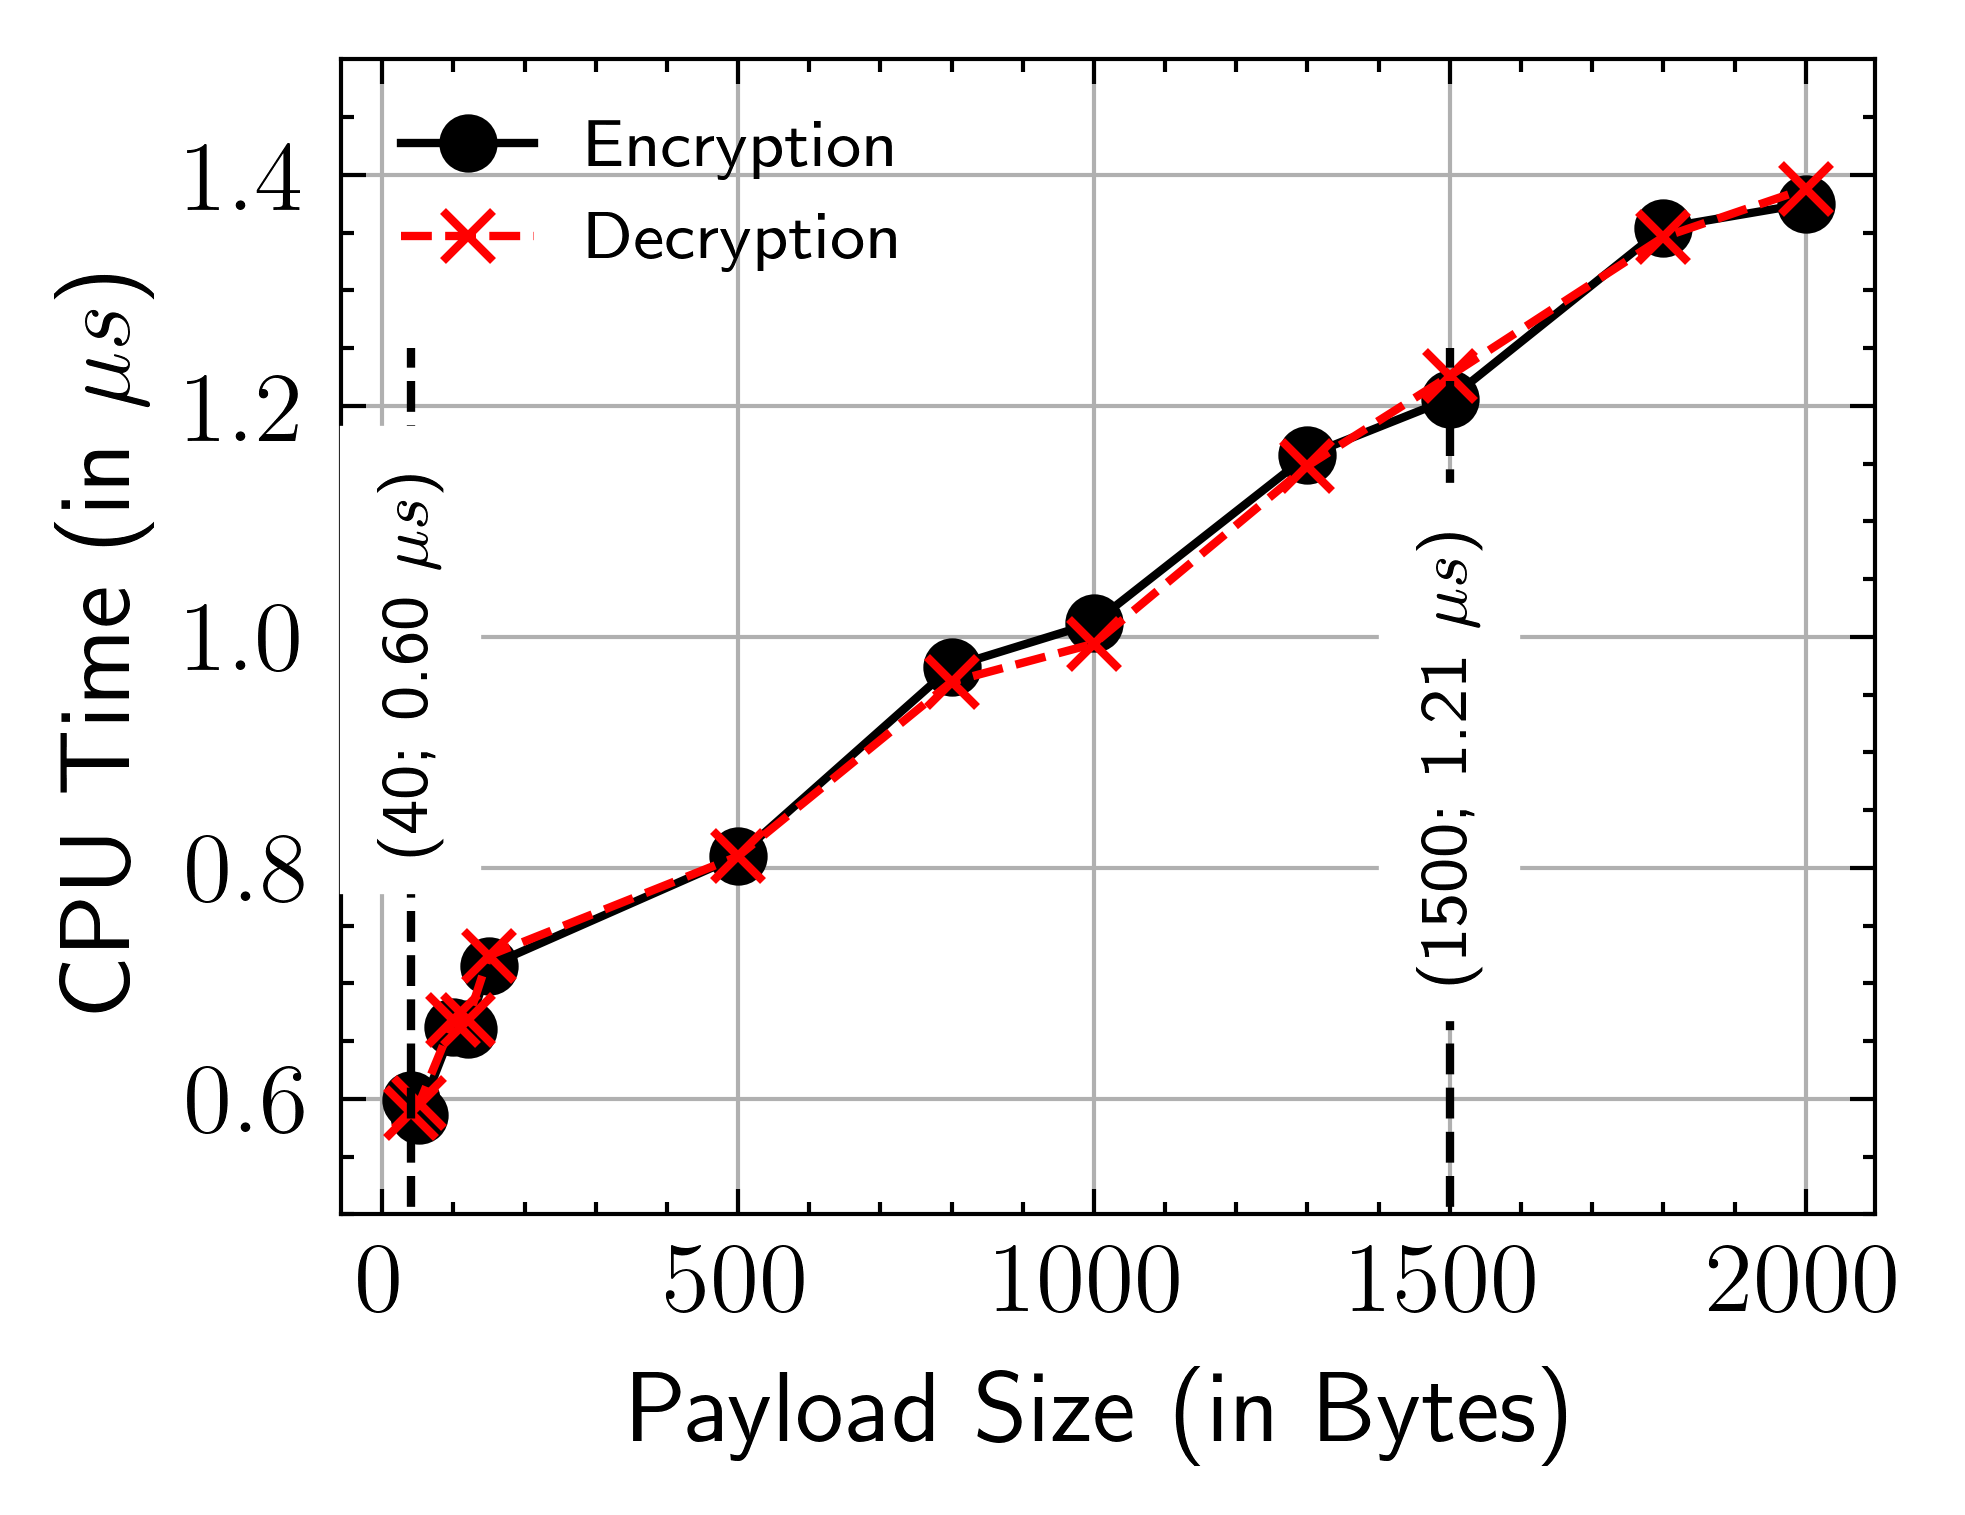

In [56]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)

with plt.style.context(['science', 'ieee']):
    ax = df_encrypt.plot(x='payload', y='time', label='Encryption', grid=True, marker='o')
    df_decrypt.plot(ax=ax, x='payload', y='time', ylim=[0.500, 1.500], 
                    label='Decryption', grid=True, 
                    xlabel="Payload Size (in Bytes)", 
                    ylabel="CPU Time (in $\mu s$)", marker="x")
    
    df = df_encrypt.set_index('payload')
    text = lambda x: f"({x}; {df.loc[x].time:.2f} $\mu s$)"
    draw_dashed_line(x=40, ymax=1.25, text=text(40), ytext=0.98)
    draw_dashed_line(x=1500, ymax=1.25, text=text(1500), ytext=0.90)
    
    
    plt.savefig('../figures/chachapoly-bench.pdf', dpi=300)

In [39]:
df.loc[40]

benchmark    BM_Encrypt
time              0.599
cpu                 598
Name: 40, dtype: object

In [26]:
1500/120

12.5